## 이미지 생성 파이프라인

In [1]:
from dotenv import load_dotenv
import os
from PIL import Image

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')

### 1. 사용자에게 이미지 입력 받기

 - Image 형태는 사용자에게 출력, 저장하기 위한 형태
 - 모델에 전달되는 형태는 bytes 형태

In [2]:
room_image_path = 'datas/images/test1.jpg'

# 이미지를 파일에서 Pillow Image로 불러옴
input_image = Image.open(room_image_path)
                               
# base64로 들어왔을 경우
image_base64 = None
# input_image = base64_to_image(image_base64)

# 변환해서 저장하고 path 반환받아야 함

### 이미지 유사도 검색

### 2. 요약 생성

In [3]:
from modules.image_generation import ImageGenerator

generator = ImageGenerator()

"""
프롬프트 수정 필요
"""

system_prompt = "입력되는 이미지를 설명 예시와 유사하게 인테리어 스타일을 묘사하여라."
# 출력 형식도 선언해주어야함. 인테리어 분석과, 화분을 놓을 위치, 색상이 출력되어야 함

user_prompt = "다음 방 이미지의 인테리어 스타일을 묘사해줘."

# 가장 유사한 이미지의 설명 텍스트
# 임시로 설정한 데이터 : 실제로는 벡터DB에서 검색해서 나온 가장 유사한 이미지의 설명
reference_text = """{  "response": "✔ 전체 분위기\n미니멀 & 무채색 기반: 화이트/연그레이 톤의 벽, 바닥, 주방 가구가 공간을 깔끔하고 넓게 보이게 함\n따뜻한 우드 포인트: 식탁·의자·천장 선풍기 날개가 공간에 자연스러운 온기 추가\n라인이 깔끔한 빌트인 구조: 냉장고, 수납, 주방 수납이 모두 매립형이어서 군더더기 없음\n✔ 가구 배치\n주방과 거실의 개방형 구조(오픈 플랜)\n주방 아일랜드가 중심점 역할\n식탁은 아일랜드 바로 앞에 배치되어 동선이 편리함\n가구 수가 적고 심플해 공간이 넓어 보이는 구성",    "plant_interior": "미니멀 인테리어를 해치지 않으면서 자연미를 더하는 포인트로 배치해보면 좋아요.\n1️⃣ 주방 아일랜드 오른쪽 끝(이미 디퓨저 있는 자리 옆)\n작은 관엽식물(몬스테라 소형, 필로덴드론, 산세베리아 미니 등) 두면 잘 어울림\n공간의 균형도 맞고, 주방이 생동감 있어짐\n2️⃣ 식탁 옆 바닥 공간(식탁과 소파 사이 여유 있는 구역)\n70~100cm 정도 크기의 중형 화분이 잘 어울림\n추천: 파키라, 떡갈고무나무, 알로카시아, 아레카야자\n우드 식탁과 자연스럽게 조화를 이룸\n3️⃣ 냉장고 왼쪽 벽면 앞\n좁고 높은 공간에 맞는 슬림한 세로형 식물 두기 좋음\n예: 올리브 나무, 고무나무, 벵갈고무나무",    "flowerpot": "화분은 모던한 하얀색 도자기 스타일 또는 매트한 아이보리·그레이 톤 화분이 미니멀 인테리어와 가장 잘 어울림."}"""


summarize = generator.generate_image_summarize(input_image_path=room_image_path, system_prompt=system_prompt, user_prompt=user_prompt, reference_text=reference_text)

/opt/anaconda3/envs/project3/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [18]:
import json

summ_json = json.loads(summarize)

print(summ_json['response'])

✔ 전체 분위기
클래식 & 소프트 컬러: 민트색 캐비닛과 화이트 타일 백스플래시가 밝고 상쾌한 분위기를 연출
우드 바닥이 따뜻함을 더해주며 클래식한 조화를 이루고 있음
✔ 가구 배치
캐비닛은 벽에 맞추어 설치되어 공간을 효율적으로 활용
세탁기와 건조기가 나란히 배치되어 사용이 편리함
상부 캐비닛은 수납 공간을 최대화
✔ 장식 요소
작은 화분과 시계가 캐비닛 위에 놓여 있어 아기자기한 느낌
세탁기 위 선반에 바구니가 배치되어 실용성을 더함


### 3. 이미지 생성

In [6]:
# 추천 받은 꽃 데이터 받아옴
import requests

# data = None

# flower_name = data["flowNm"]
# flower_image_url = data["imageUrl1"]

# response = requests.get(flower_image_url)
# 이미지 저장해서 path 선언해야 함

In [7]:
# 실제로는 추천 받은 데이터에서 가져와야할 부분

flower_name = "산세베리아"          # 임시로 임의의 식물 사용
flower_image_path = "datas/images/730017_565845_3235.png"   # 임시로 저장되어 있는 테스트 사진 사용

In [8]:
# 프롬프트 수정 필요함
# 식물 이름을 넘겨주고, 인테리어 설명도 같이 넘겨서 해당 위치에 제대로 합성되도록 함
prompt = f"다음은 내 집 사진과 {flower_name} 사진이야. 이 두 사진을 다음 예시 설명에 맞춰서 적절한 위치에 화분으로 합성해줘. 예시 설명: {summarize}"

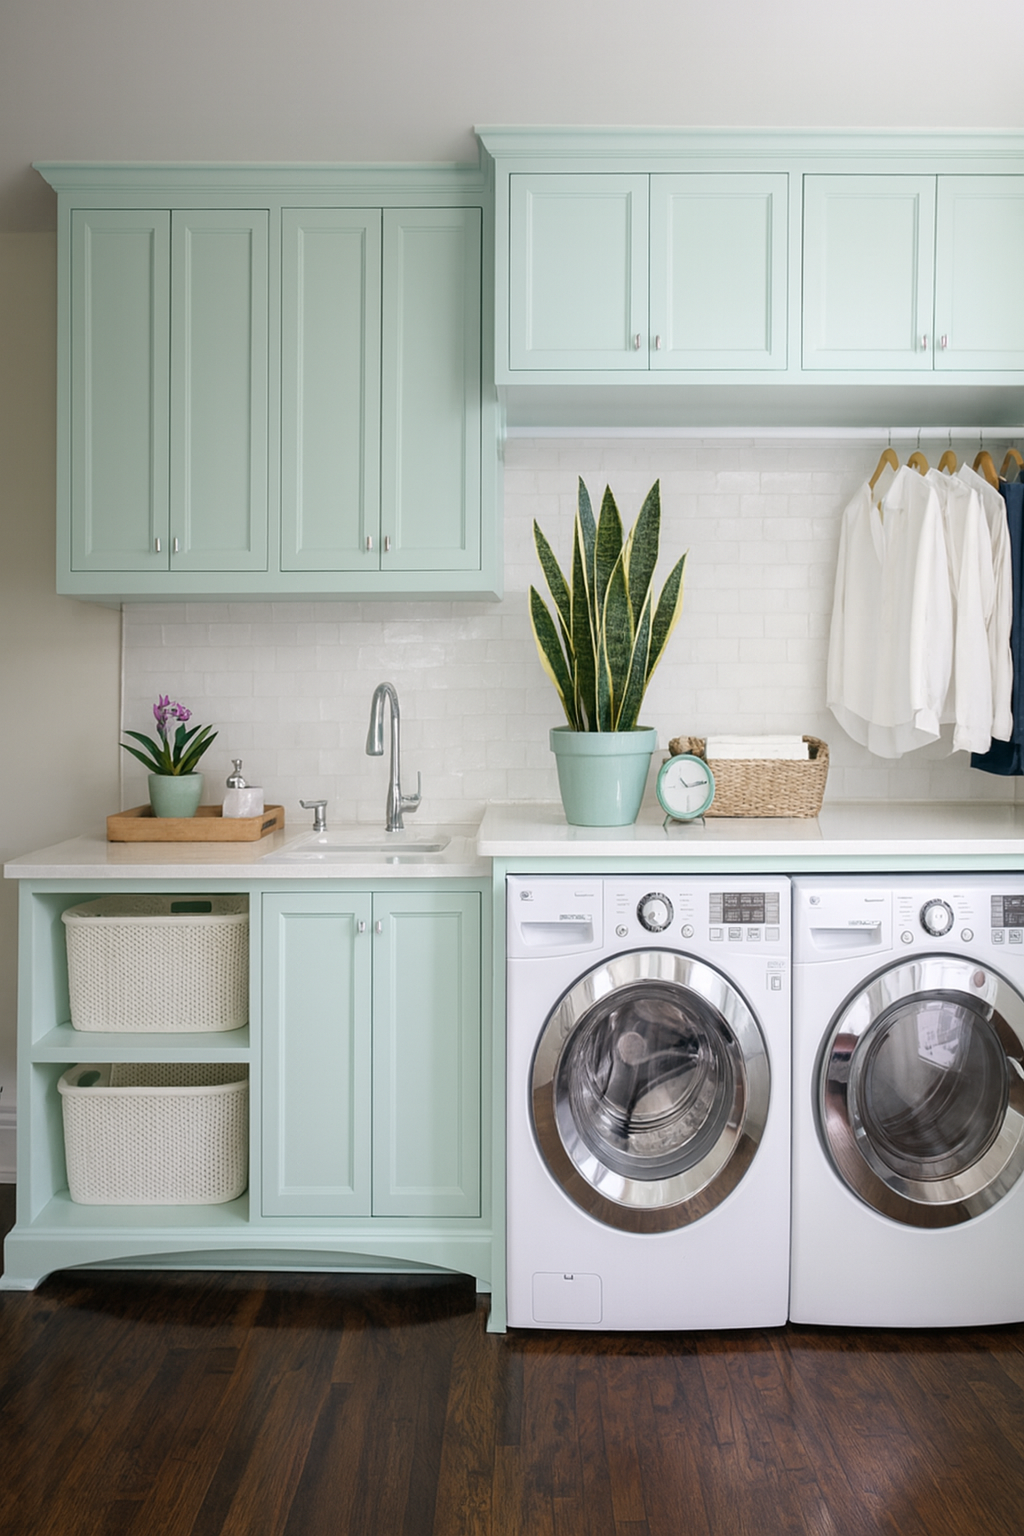

In [9]:
# 이미지 생성 -> 출력은 Image.Image 형태
generator.generate_image_with_image_edit("datas/images/test1.jpg", "datas/images/730017_565845_3235.png", prompt)